In [ ]:
# Centroid_test_profile

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from scipy import interpolate, signal, stats

%matplotlib inline

In [3]:
df=pd.read_csv("D:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights\\CoreBx\\test_profile.csv",header = 0)
#print(df)
print("Read: ",len(df.index),' lines.')
df

Read:  1024  lines.


,ID,X,Y,Elevation,Elevation (2019-08-30_1m_DEM_4D_crop2.tif),Elevation (Fill_2019091213_EBK_linear_1m.tif),Elevation (2019-09-12-13_1mDEM_4D_v3.tif),Elevation (2019-10-11_1m_DEM_4D_crop.tif),Elevation (2019-11-26_1m_DEM_4D_crop.tif),Distance (Segment),Distance (Total),Distance 3D (Segment),Distance 3D (Total),Slope (Degrees),Slope (Percent),Segment Index
0,1,392505.563,3870013.332,2.746,3.054,3.536,3.022,2.789,2.746,0.0000,0.0000,0.0000,0.0000,-,-,1
1,2,392505.932,3870013.020,2.676,2.918,3.556,2.920,2.707,2.676,0.4832,0.4832,0.4882,0.4882,8.2,14.4%,1
2,3,392506.301,3870012.708,2.634,2.848,3.568,2.812,2.706,2.634,0.4832,0.9660,0.4851,0.9730,5.0,8.8%,1
3,4,392506.670,3870012.396,2.596,2.791,3.569,2.713,2.672,2.596,0.4832,1.4500,0.4847,1.4580,4.5,7.9%,1
4,5,392507.038,3870012.084,2.573,2.804,3.565,2.681,2.511,2.573,0.4832,1.9330,0.4837,1.9420,2.7,4.7%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1020,392881.456,3869695.463,0.608,NaN,NaN,NaN,NaN,NaN,0.4832,492.4000,0.4832,504.4400,0.0,0.0%,1
1020,1021,392881.825,3869695.151,0.608,NaN,NaN,NaN,NaN,NaN,0.4832,492.8900,0.4832,504.9200,0.0,0.0%,1
1021,1022,392882.193,3869694.839,0.608,NaN,NaN,NaN,NaN,NaN,0.4832,493.3700,0.4832,505.4100,0.0,0.0%,1
1022,1023,392882.562,3869694.527,0.608,NaN,NaN,NaN,NaN,NaN,0.4832,493.8500,0.4832,505.8900,0.0,0.0%,1


In [81]:
dist = np.array(df['Distance (Total)'])
Aug = np.array(df['Elevation (2019-08-30_1m_DEM_4D_crop2.tif)'])
Sep = np.array(df['Elevation (2019-09-12-13_1mDEM_4D_v3.tif)'])
Oct = np.array(df['Elevation (2019-10-11_1m_DEM_4D_crop.tif)'])
Nov = np.array(df['Elevation (2019-11-26_1m_DEM_4D_crop.tif)'])
Sep_fill = np.array(df['Elevation (Fill_2019091213_EBK_linear_1m.tif)'])
dx = np.array(df['Distance (Segment)'])[1]
print('dx: ',dx)
#cols=['#fef0d9','#fdcc8a','#fc8d59','#d7301f']
cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']

profs = np.array([Aug,Sep,Oct,Nov])
pnames=['28-Aug','13-Sep','11-Oct','26-Nov']

print("Stack of profiles with shape: ",np.shape(profs))

dx:  0.4832
Stack of profiles with shape:  (4, 1024)


In [64]:
def centroid(x,z):
    cz = np.nanmean(z)
    cx = np.nansum(z*x)/np.nansum(z)
    return(cx,cz)

In [65]:
# replace missing data in Oct and Nov with Sep_fill
proff = profs.copy()
for i in range(0,4):
    print(pnames[i])
    idx = np.argwhere(np.isnan(profs[i,:]))
    proff[i,idx]=Sep_fill[idx].copy()
    print('  Nans:', len(idx), np.sum(np.isnan(proff[i,:])))


28-Aug
  Nans: 96 96
13-Sep
  Nans: 193 96
11-Oct
  Nans: 268 96
26-Nov
  Nans: 49 49


In [100]:
# extend profile using last two points
for i in range(0,4):
    ilast = np.argwhere(np.isnan(proff[i,:]))[0]
    slp = (proff[i,ilast-1]-proff[i,ilast-2])/dx
    if(slp<0):
        proff[i,int(ilast):]=proff[i,int(ilast)-1]+slp*(dist[int(ilast):]-dist[int(ilast)-1])
    print(ilast,proff[i,ilast-1],proff[i,ilast-2],slp)

[928] [1.397] [1.442] [-0.09312914]
[928] [-0.445] [-0.439] [-0.01241722]
[928] [-0.445] [-0.439] [-0.01241722]
[975] [0.608] [0.653] [-0.09312914]


In [101]:
cxcy = np.zeros((4,2))
for i in range(0,4):
    cxcy[i,0],cxcy[i,1] = centroid(dist,proff[i,:])
    
cxcy

array([[220.46522494,   1.94660716],
       [ 89.64525636,   0.85288162],
       [146.91473119,   0.95591247],
       [196.4653703 ,   1.20534008]])

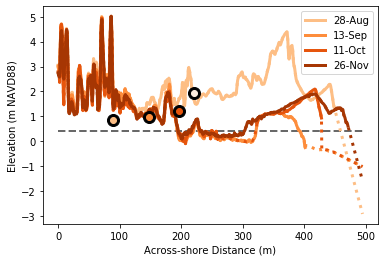

In [102]:
plt.plot(dist,np.ones_like(dist)*0.4,'--',c='dimgray',linewidth=2)
for i in range(0,4):
    plt.plot(dist,profs[i,:],'-',linewidth=3,c=cols[i+1],label=pnames[i])
    plt.plot(dist,proff[i,:],':',linewidth=3,c=cols[i+1])
for i in range(0,4):
    plt.plot(cxcy[i,0],cxcy[i,1],'ok',ms=12)
    plt.plot(cxcy[i,0],cxcy[i,1],'o',c=cols[i])

plt.legend()
plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Across-shore Distance (m)')
plt.savefig('profile.svg')

In [28]:
# volumes
Oct_v = np.nansum(Oct)
Oct_vf = np.nansum(Oct_fill)
print(Oct_v,Oct_vf)
Nov_v = np.nansum(Nov)
Nov_vf = np.nansum(Nov_fill)
print(Nov_v,Nov_vf)

1055.5785913396 1049.5064015177
1259.591 1259.591


In [27]:
# volume differences
Nov_minus_Oct = Nov_fill-Oct_fill
print(np.nansum(Nov_minus_Oct))

156.41559848230003
